## Outline of steps
* [step0](#step0): import necessary packages
* [step1](#step1): import dataset `part1_dataset.pickle` as `part2_dataset`
* [step2](#step2): observe the missing values in dataset `part2_dataset`
* [step3](#step3): drop out rows contain missing values
* [step4](#step4): remove duplicated rows
* [step5](#step5): save the dataset as `part2_dataset.pickle`

In [1]:
# import necessary packages
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno # module for missing value visualization

# Pretty display for notebooks
%matplotlib inline

<a id="step1"></a>
## step1: import dataset `part1_dataset.pickle`

In [36]:
part2_dataset = pd.read_pickle("part1_dataset.pickle")  

<a id="step2"></a>
## step2: observe the missing values in dataset

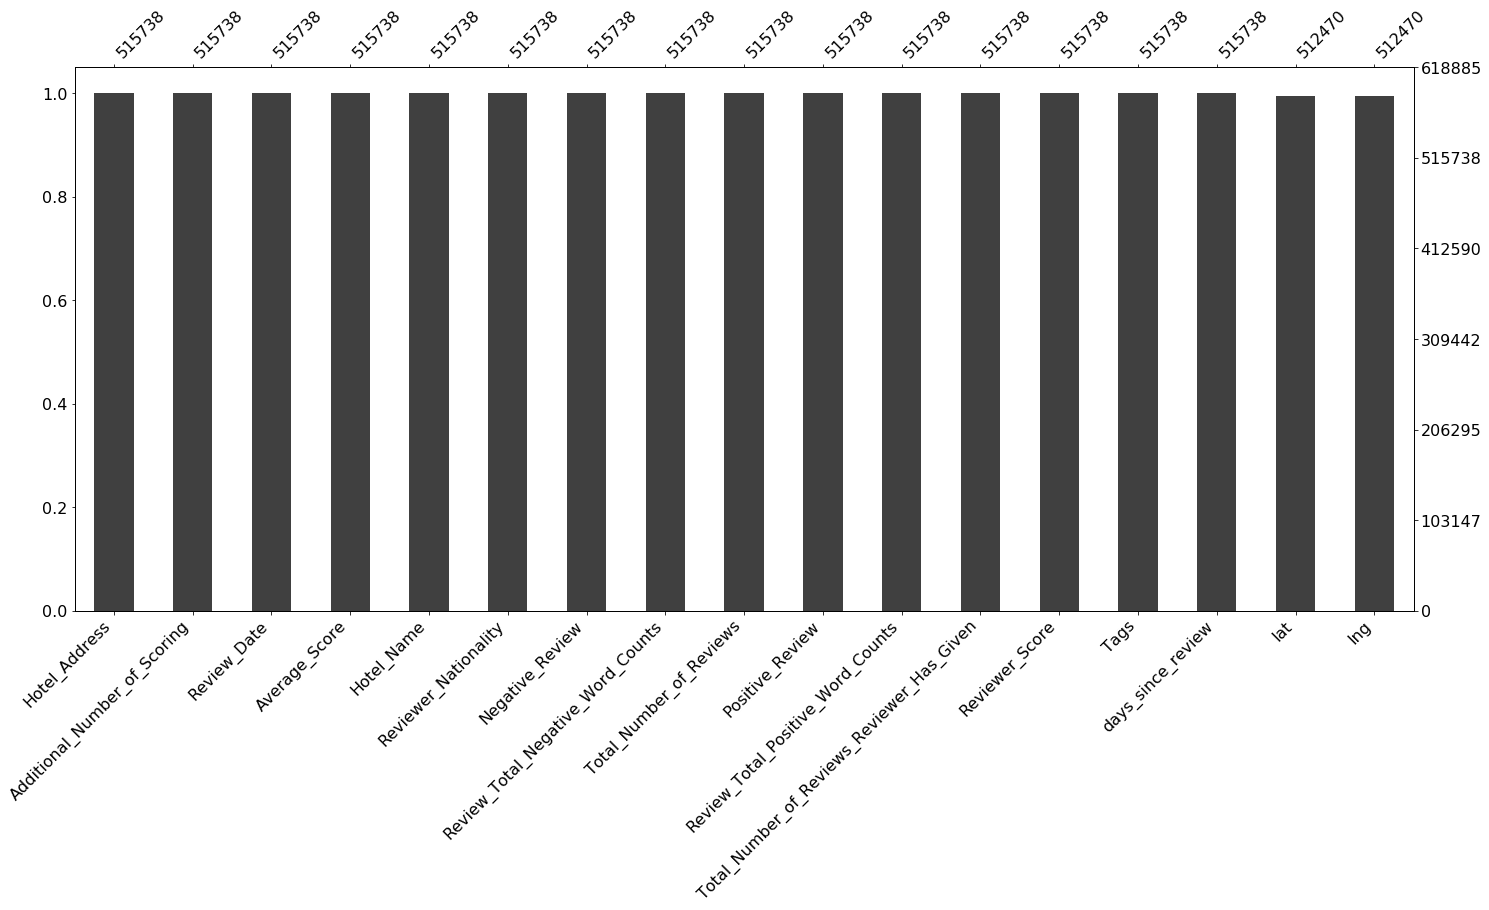

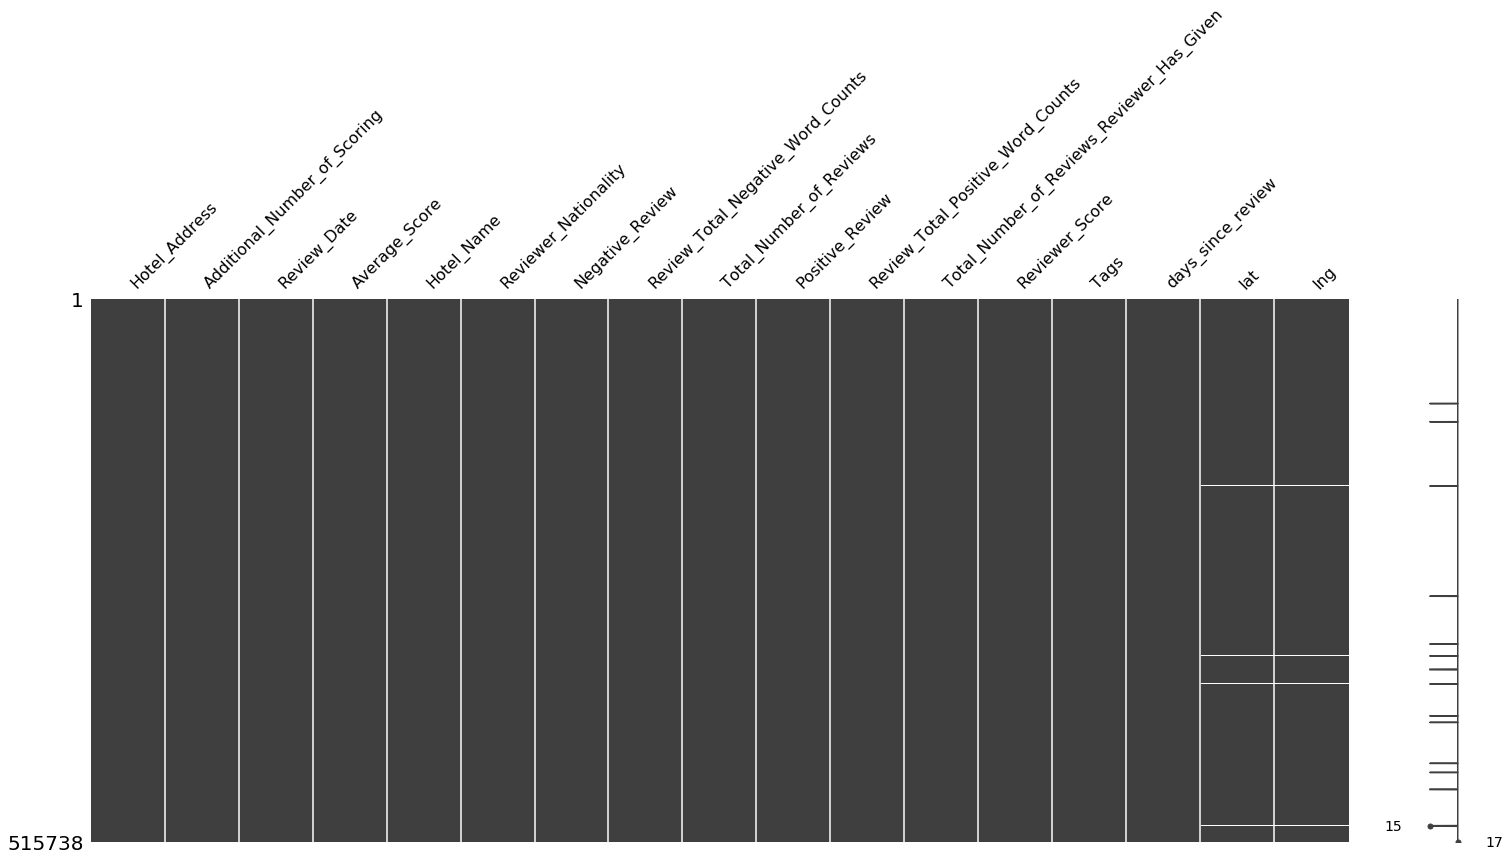

In [4]:
# visualization of the missing values
msno.bar(part2_dataset) # show up the percentage of missing values in each column
msno.matrix(part2_dataset) # show up the distribution of missing values in each row

In [37]:
# calculate how many missing rows
num_missing_rows = part2_dataset.isnull().any(axis=1).sum()
print("number of rows contain missing values: {}\n".format(num_missing_rows))

'''
# another code version to calculate how many rows contain missing values 
missing_rows = part2_dataset[part2_dataset.isnull().any(axis=1)]
display(missing_rows.head(n=2))
display("Shape of missing rows: {}".format(missing_rows.shape))
'''

# check out which column contains missing values
print("check out which column contains missing values\n")
col_with_na = part2_dataset.isnull().any(axis=0)
print(col_with_na[col_with_na == True])

number of rows contain missing values: 3268

check out which column contains missing values

lat    True
lng    True
dtype: bool


<a id="step3"></a>
## step3: drop out rows contain missing values
We can tell that missing values exist in `lat` and `lng` columns. Besides, for there are only 3268 records contain missing value, it's relatively small portion to the whole dataset. I will just drop them all.

In [38]:
# drop out all missing rows
part2_dataset = part2_dataset[~part2_dataset.isnull().any(axis=1)]

# Check up again if there still contains missing values
print("check up columns contain missing values.\n")
part2_dataset.isnull().sum()

check up columns contain missing values.



Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
dtype: int64

<a id="step4"></a>
## step4: remove duplicated rows

In [39]:
# check up the shape of dataset before removing the duplicated records
print("Before removing duplicated records, the shape of dataset: {}".format(part2_dataset.shape))

num1 = part2_dataset.shape[0]

# After removing the duplicated records
part2_dataset.drop_duplicates(inplace=True)
print("After removing duplicated records, the shape of dataset: {}".format(part2_dataset.shape))

num2 = part2_dataset.shape[0]

print("number of duplicated rows being dropped out:{}".format(num1-num2))

Before removing duplicated records, the shape of dataset: (512470, 17)
After removing duplicated records, the shape of dataset: (511944, 17)
number of duplicated rows being dropped out:526


<a id="step5"></a>
## step5: save the dataset as `part2_dataset.pickle`

In [40]:
part2_dataset.to_pickle("part2_dataset.pickle")